In [2]:
#Datasets on Red and White Wine
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
#Dataset Description
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names


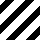
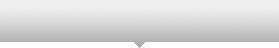
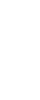
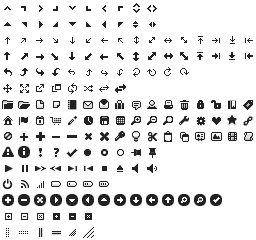
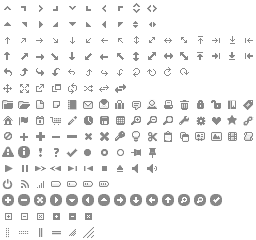
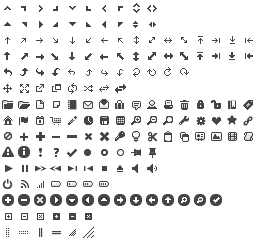
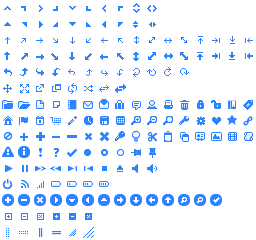
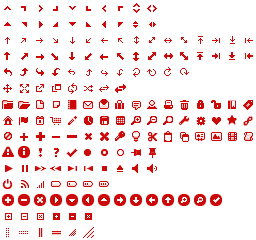
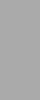
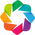
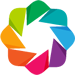
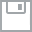
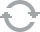
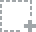
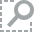
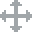
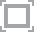
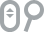

In [58]:
import pandas as pd
import numpy as np
import csv
from pandas import DataFrame, index
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show,output_notebook
output_notebook()
%matplotlib inline
# Statsmodel APIs
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from sklearn import datasets
from sklearn import preprocessing
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import Ridge, Lasso

In [4]:
data1 = pd.read_csv("winequality-white2.csv")
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
dataw=pd.DataFrame(data1,columns=columns)
dataw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [5]:
dataw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


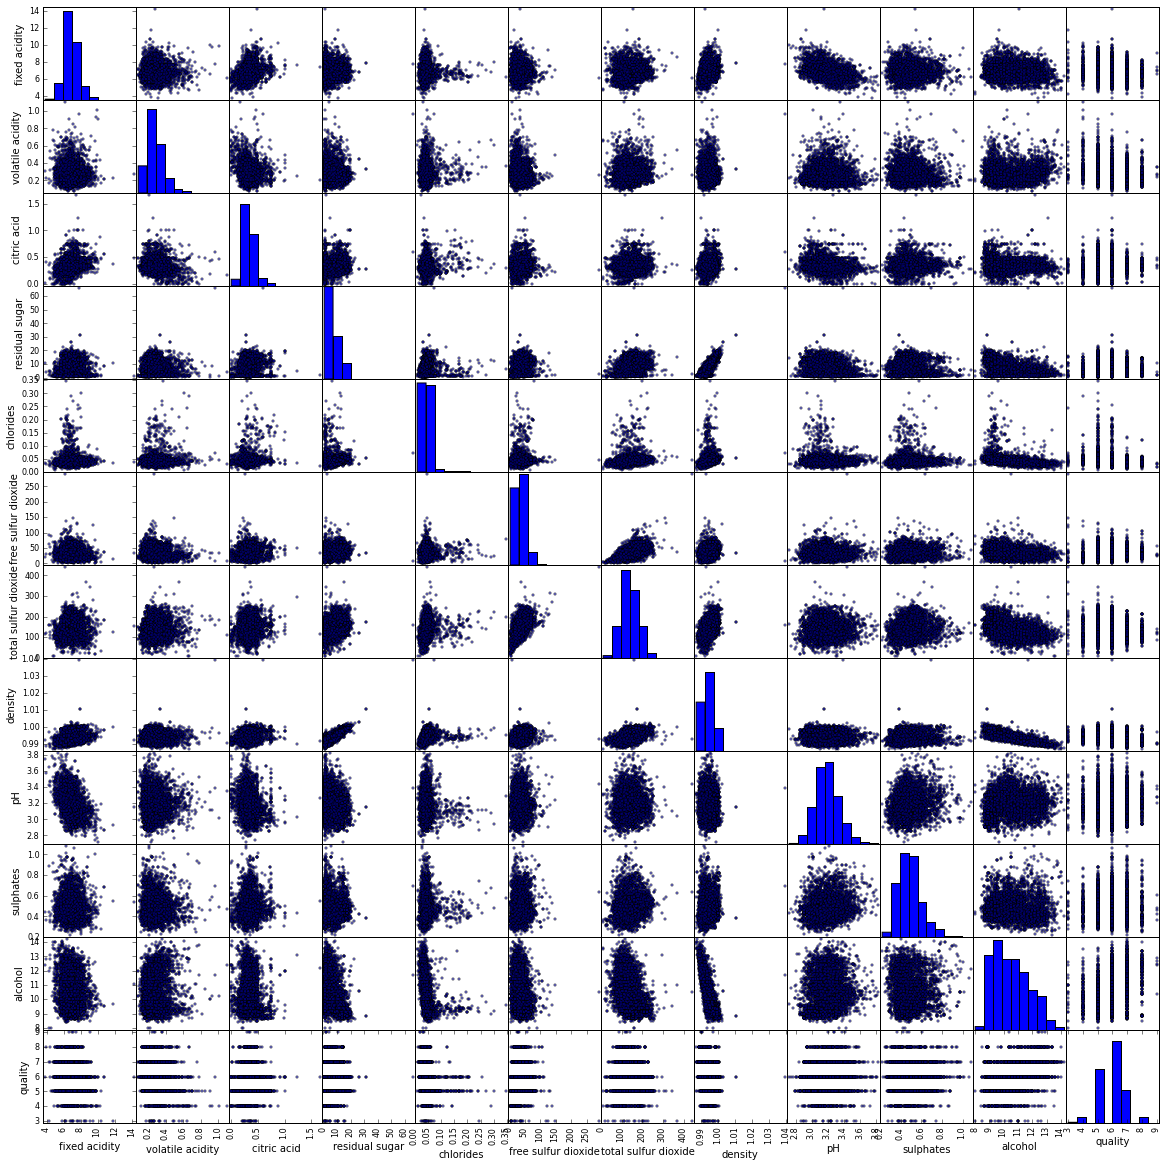

In [6]:
scatw = scatter_matrix(dataw, figsize = (20,20))

In [7]:
data2 = pd.read_csv("winequality-red2.csv")
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
datar=pd.DataFrame(data2,columns=columns)
datar.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [8]:
datar.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


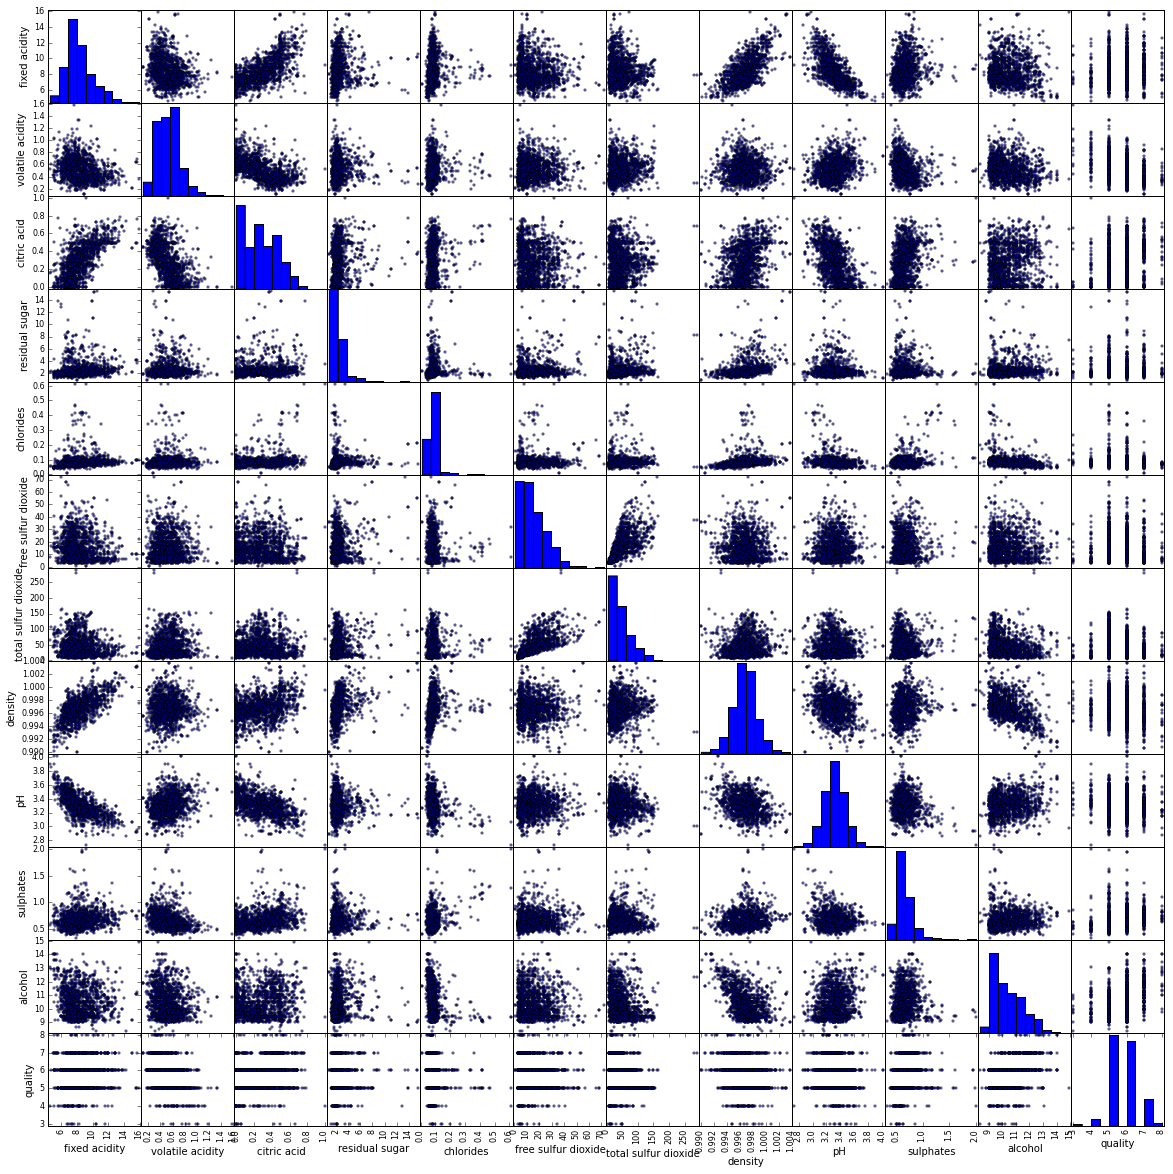

In [9]:
scatr = scatter_matrix(datar, figsize = (20,20))

In [10]:
#Corelation
#A lot of variables seem to be related to each other. For example, density seems to increase with increase in fixed acidity
#where as ph value seems to decrease with increase in fixed_acidity

#Quality for white wine is categorized under 6 labels from 3 to 8, both inclusive.
#Quality for red wine is categorized under 7 labels from 3 to 7, both inclusive.

In [11]:
w1 = dataw["fixed acidity"]
w2 = dataw["density"]
np.correlate(w1,w2)

array([ 33377.500068])

In [12]:
np.corrcoef(w1,w2)

array([[ 1.        ,  0.26533101],
       [ 0.26533101,  1.        ]])

In [13]:
pearsonr(w1,w2)

(0.26533101383918639, 1.0478769743140578e-79)

In [14]:
r1 = datar["fixed acidity"]
r2 = datar["density"]
np.correlate(r1,r2)

array([ 13263.328715])

In [15]:
np.corrcoef(r1,r2)

array([[ 1.        ,  0.66804729],
       [ 0.66804729,  1.        ]])

In [16]:
pearsonr(r1,r2)

(0.6680472921189744, 3.0747470608567314e-207)

In [17]:
#There are 12 feaures in each data set. Some of the features have higher std. dev. than others.
#For example, free sulfur dioxide" and "total sulfur dioxide".

In [18]:
#Normalizing Data

In [19]:
normalized_dataw=preprocessing.normalize(dataw, axis=0)
normalized_dataw

array([[ 0.01448202,  0.01303656,  0.01447256, ...,  0.012784  ,
         0.01187792,  0.01442266],
       [ 0.01303382,  0.01448506,  0.01366853, ...,  0.01392036,
         0.01282275,  0.01442266],
       [ 0.01675776,  0.01351939,  0.01608062, ...,  0.01249991,
         0.01363261,  0.01442266],
       ..., 
       [ 0.01344759,  0.01158805,  0.0076383 , ...,  0.01306809,
         0.01268778,  0.01442266],
       [ 0.01137873,  0.01400223,  0.01206047, ...,  0.01079538,
         0.01727697,  0.01682644],
       [ 0.01241316,  0.01013954,  0.01527659, ...,  0.00909085,
         0.01592721,  0.01442266]])

In [47]:
columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
datawn = pd.DataFrame(normalized_dataw,columns=columns)
datawn.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.014182,0.013434,0.013435,0.011193,0.012895,0.012873,0.013659,0.014289,0.014273,0.013916,0.014192,0.014129
std,0.001746,0.004867,0.004865,0.008882,0.006155,0.006201,0.004195,0.000043,0.000676,0.003242,0.001661,0.002129
min,0.007862,0.003863,0.000000,0.001051,0.002536,0.000729,0.000888,0.014189,0.012176,0.006250,0.010798,0.007211
25%,0.013034,0.010140,0.010854,0.002977,0.010142,0.008386,0.010662,0.014255,0.013833,0.011648,0.012823,0.012019
50%,0.014068,0.012554,0.012864,0.009107,0.012114,0.012396,0.013228,0.014284,0.014236,0.013352,0.014038,0.014423
75%,0.015103,0.015451,0.015679,0.017337,0.014086,0.016772,0.016486,0.014318,0.014683,0.015625,0.015387,0.014423
max,0.029378,0.053112,0.066735,0.115232,0.097477,0.105369,0.043437,0.014935,0.017101,0.030682,0.019167,0.021634


In [48]:
normalized_datar=preprocessing.normalize(datar, axis=0)
normalized_datar

array([[ 0.02177213,  0.03140851,  0.        , ...,  0.02060638,
         0.02243649,  0.02196153],
       [ 0.022949  ,  0.03948498,  0.        , ...,  0.02502204,
         0.02339123,  0.02196153],
       [ 0.022949  ,  0.03410067,  0.0029977 , ...,  0.02391812,
         0.02339123,  0.02196153],
       ..., 
       [ 0.01853573,  0.02288334,  0.00974251, ...,  0.02759784,
         0.02625546,  0.02635384],
       [ 0.01735886,  0.0289407 ,  0.00899309, ...,  0.02612595,
         0.02434597,  0.02196153],
       [ 0.01765308,  0.01390948,  0.03522293, ...,  0.02428609,
         0.02625546,  0.02635384]])

In [49]:
columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
datarn = pd.DataFrame(normalized_datar,columns=columns)
datarn.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.024478,0.023683,0.020308,0.021864,0.022024,0.020884,0.020413,0.025008,0.024981,0.024218,0.024878,0.024755
std,0.005123,0.008034,0.014599,0.012142,0.011851,0.013761,0.014451,0.000047,0.001165,0.006237,0.002544,0.003547
min,0.013534,0.005384,0.000000,0.007751,0.003022,0.001316,0.002636,0.024840,0.020672,0.012143,0.020050,0.013177
25%,0.020889,0.017499,0.006745,0.016363,0.017626,0.009209,0.009665,0.024979,0.024218,0.020238,0.022675,0.021962
50%,0.023243,0.023332,0.019485,0.018946,0.019892,0.018418,0.016693,0.025008,0.024972,0.022814,0.024346,0.026354
75%,0.027068,0.028716,0.031476,0.022391,0.022661,0.027626,0.027236,0.025035,0.025651,0.026862,0.026494,0.026354
max,0.046781,0.070893,0.074942,0.133486,0.153846,0.094719,0.126957,0.025182,0.030253,0.073594,0.035564,0.035138


In [50]:
#Applying GLM on White Wine

In [52]:
results_white = smf.ols('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=datarn).fit()

In [53]:
results_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 24 Aug 2015   Prob (F-statistic):          1.79e-145
Time:                        19:58:50   Log-Likelihood:                 7110.1
No. Observations:                1599   AIC:                        -1.420e+04
Df Residuals:                    1587   BIC:                        -1.413e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0965      0.093      1.036      0.300        -0.086     0.279
fixed_acidity            0.0373      0.039      0.963      0.336        -0.039     0.113
volatile_acidity        -0.1061      0.012     -8.948      0.000        -0.129    -0.083
citric_acid             -0.0107      0.009     -1.240      0.215        -0.028     0.006
residual_sugar           0.0083      0.008      1.089      0.276        -0.007     0.023
chlorides               -0.0327      0.007     -4.470      0.000        -0.047    -0.018
free_sulfur_dioxide      0.0146      0.007      2.009      0.045         0.000     0.029
total_sulfur_dioxide    -0.0326      0.007     -4.480      0.000        -0.047    -0.018
density                 -3.1304      3.787     -0.827      0.409       -10.559     4.298
pH                      -0.2408      0.112     -2.159      0.031        -0.460    -0.022
sulphates                0.1094      0.014      8.014      0.000         0.083     0.136
alcohol                  0.5083      0.049     10.429      0.000         0.413     0.604
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     5.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#Appling GLM on Red Wine

In [55]:
results_red = smf.ols('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data=datarn).fit()

In [56]:
results_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 24 Aug 2015   Prob (F-statistic):          1.79e-145
Time:                        19:59:01   Log-Likelihood:                 7110.1
No. Observations:                1599   AIC:                        -1.420e+04
Df Residuals:                    1587   BIC:                        -1.413e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0965      0.093      1.036      0.300        -0.086     0.279
fixed_acidity            0.0373      0.039      0.963      0.336        -0.039     0.113
volatile_acidity        -0.1061      0.012     -8.948      0.000        -0.129    -0.083
citric_acid             -0.0107      0.009     -1.240      0.215        -0.028     0.006
residual_sugar           0.0083      0.008      1.089      0.276        -0.007     0.023
chlorides               -0.0327      0.007     -4.470      0.000        -0.047    -0.018
free_sulfur_dioxide      0.0146      0.007      2.009      0.045         0.000     0.029
total_sulfur_dioxide    -0.0326      0.007     -4.480      0.000        -0.047    -0.018
density                 -3.1304      3.787     -0.827      0.409       -10.559     4.298
pH                      -0.2408      0.112     -2.159      0.031        -0.460    -0.022
sulphates                0.1094      0.014      8.014      0.000         0.083     0.136
alcohol                  0.5083      0.049     10.429      0.000         0.413     0.604
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     5.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#Regresion